In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
import os
print(os.getcwd())

/home/jovyan/work/mipt/homeworks/1 homework


In [3]:
original_train = pd.read_csv('./house-prices-advanced-regression-techniques/train.csv')

In [4]:
train = original_train.copy()

In [5]:
original_test = pd.read_csv('./house-prices-advanced-regression-techniques/test.csv')

In [6]:
test = original_test.copy()

In [7]:
sample_submission = pd.read_csv ("./house-prices-advanced-regression-techniques/sample_submission.csv")

In [8]:
pd.options.display.max_columns = 200

In [9]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [10]:
test.head(4)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal


In [11]:
sample_submission.head()

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977


In [12]:
train.shape

(1460, 81)

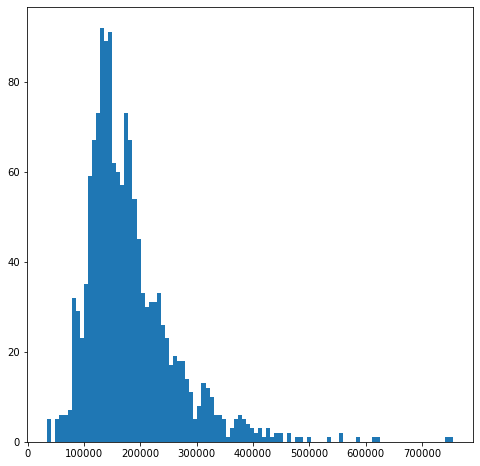

In [13]:
plt.figure(figsize= (8,8))
plt.hist(train['SalePrice'], bins = 100)
plt.show()

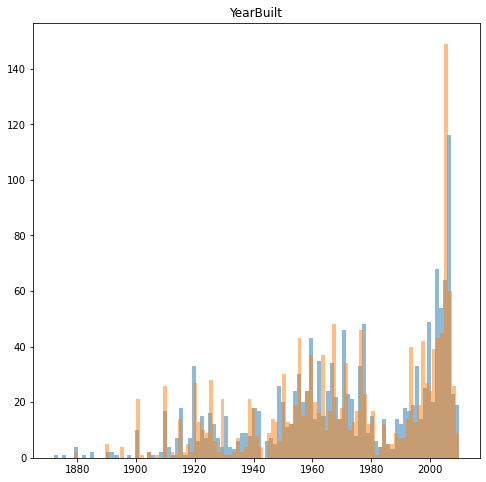

In [14]:

plt.figure(figsize= (8,8))
plt.hist(train['YearBuilt'], bins = 100, label = 'train', alpha = 0.5)
plt.hist(test['YearBuilt'], bins = 100, label = 'test', alpha = 0.5)
plt.title('YearBuilt')
plt.show()

In [15]:
train['SalePriceLog'] =  np.log1p(train['SalePrice'])
del train['SalePrice']

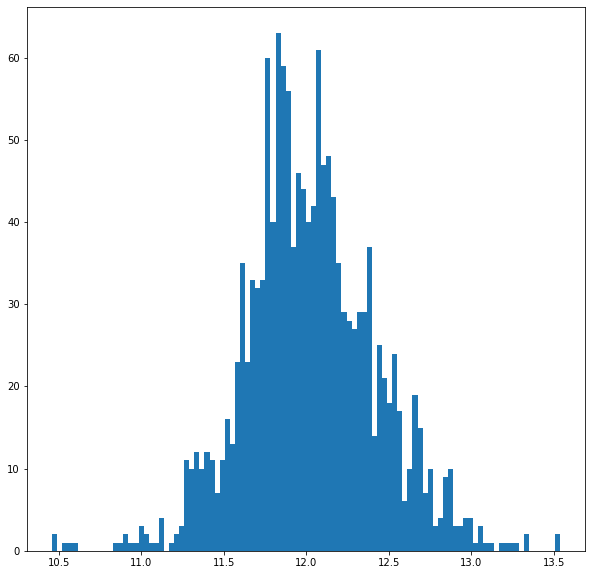

In [16]:
plt.figure(figsize= (10,10))
plt.hist(train['SalePriceLog'], bins = 100)
plt.show()

In [17]:
train['LotAreaLog'] =  np.log1p(train['LotArea'])
test['LotAreaLog'] =  np.log1p(test['LotArea'])
del train['LotArea']
del test['LotArea']

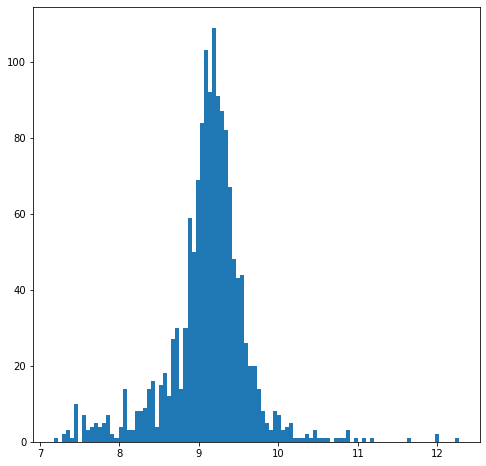

In [18]:
plt.figure(figsize= (8,8))
plt.hist(train['LotAreaLog'], bins = 100)
plt.show()

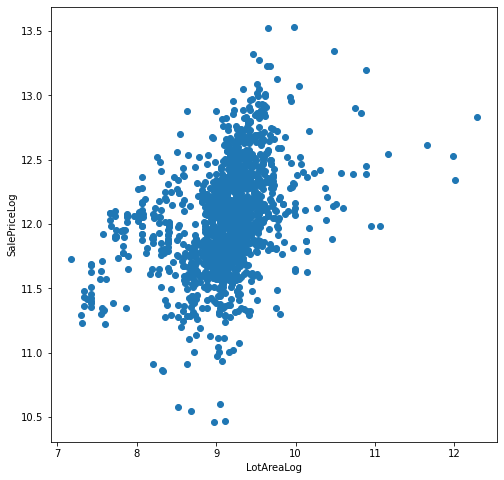

In [19]:
plt.figure(figsize= (8,8))
plt.scatter( train['LotAreaLog'], train['SalePriceLog'])
plt.xlabel('LotAreaLog')
plt.ylabel('SalePriceLog')
plt.show()

In [20]:
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import KFold

In [21]:
kf = KFold(n_splits=5)
kf.get_n_splits(train)

5

In [22]:
from sklearn.metrics import mean_squared_log_error, mean_squared_error


In [23]:
print(kf)
model = SGDRegressor()
rmse_list = []

for i, (train_index, test_index) in enumerate(kf.split(train)):
    
    X_train, X_test = train.loc[train_index, ['LotAreaLog']], train.loc[test_index, ['LotAreaLog']]
    y_train, y_test = train.loc[train_index, 'SalePriceLog'], train.loc[test_index, 'SalePriceLog']

    model.fit(X_train, y_train)
    predict = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(predict,y_test))
    rmse_list.append(rmse)
    print(i, rmse)
    
print("Mean rmse for 5-fold: {}".format(str(np.mean(rmse_list))))
print("std rmse for 5-fold: {}".format(str(np.std(rmse_list))))

KFold(n_splits=5, random_state=None, shuffle=False)
0 0.5400278952166413
1 0.6518451750150921
2 0.5756340009609975
3 0.6232843811038926
4 0.5664362489717948
Mean rmse for 5-fold: 0.5914455402536836
std rmse for 5-fold: 0.04045014539498784


In [24]:
_max = max(max(train['YearBuilt']), max(test['YearBuilt']))

In [25]:
_min = min(min(train['YearBuilt']), min(test['YearBuilt']))

In [26]:
print(_min , _max)

1872 2010


In [27]:
train['YearBuilt_0_1'] = (train['YearBuilt'] - _min)/(_max - _min)
test['YearBuilt_0_1'] = (test['YearBuilt'] - _min)/(_max - _min)
del train['YearBuilt']
del test['YearBuilt']

In [28]:
model_train = train.loc[:, ['LotAreaLog', 'YearBuilt_0_1']]
model_train

,LotAreaLog,YearBuilt_0_1
0,9.042040,0.949275
1,9.169623,0.753623
2,9.328212,0.934783
3,9.164401,0.311594
4,9.565284,0.927536
...,...,...
1455,8.976894,0.920290
1456,9.486152,0.768116
1457,9.109746,0.500000
1458,9.181735,0.565217


In [29]:
print(kf)
model = SGDRegressor()
rmse_list = []

for i, (train_index, test_index) in enumerate(kf.split(train)):
    
    X_train, X_test = model_train.loc[train_index], model_train.loc[test_index]
    y_train, y_test = train.loc[train_index, 'SalePriceLog'], train.loc[test_index, 'SalePriceLog']

    model.fit(X_train, y_train)
    print("model.coef_: ", model.coef_)
    predict = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(predict,y_test))
    rmse_list.append(rmse)
    print(i, rmse)
    
print("Mean rmse for 5-fold: {}".format(str(np.mean(rmse_list))))
print("std rmse for 5-fold: {}".format(str(np.std(rmse_list))))

KFold(n_splits=5, random_state=None, shuffle=False)
model.coef_:  [1.05059187 1.27811663]
0 0.4679683374403285
model.coef_:  [1.09071729 1.17664948]
1 0.5611200222854086
model.coef_:  [1.07263158 1.21552042]
2 0.4695581035634359
model.coef_:  [1.07062986 1.21612194]
3 0.4853095898768885
model.coef_:  [1.0767079  1.23359089]
4 0.5280006951329733
Mean rmse for 5-fold: 0.5023913496598069
std rmse for 5-fold: 0.03649561042289232


In [30]:
def save_submisson(model, model_test):
    submission = sample_submission.copy()
    predict = model.predict(model_test)
    submission['SalePrice'] = np.exp(predict)-1
    print(submission.head())
    submission.to_csv('submission.csv', index = None)
    

In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold

In [32]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePriceLog,LotAreaLog,YearBuilt_0_1
0,1,60,RL,65.0,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,12.247699,9.042040,0.949275
1,2,20,RL,80.0,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,12.109016,9.169623,0.753623
2,3,60,RL,68.0,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,12.317171,9.328212,0.934783
3,4,70,RL,60.0,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,11.849405,9.164401,0.311594
4,5,60,RL,84.0,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,12.429220,9.565284,0.927536


In [33]:
model_train = train.loc[:, ['LotAreaLog', 'YearBuilt_0_1']]
model_test = test.loc[:, ['LotAreaLog', 'YearBuilt_0_1']]
model_train_y = train.loc[:, 'SalePriceLog']

In [34]:
kf = KFold(n_splits=5)
kf.get_n_splits(train)

5

In [35]:
print(kf)
model = LinearRegression()
rmse_list = []

for i, (train_index, test_index) in enumerate(kf.split(train)):
    
    X_train, X_test = model_train.loc[train_index], model_train.loc[test_index]
    y_train, y_test = model_train_y.loc[train_index], model_train_y.loc[test_index]

    model.fit(X_train, y_train)
    print("model.coef_: ", model.coef_)
    predict = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(predict,y_test))
    rmse_list.append(rmse)
    print(i, rmse)
    
print("Mean rmse for 5-fold: {}".format(str(np.mean(rmse_list))))
print("std rmse for 5-fold: {}".format(str(np.std(rmse_list))))

KFold(n_splits=5, random_state=None, shuffle=False)
model.coef_:  [0.2924847 1.0655613]
0 0.26819518100009365
model.coef_:  [0.30437363 1.03652501]
1 0.29854100406346634
model.coef_:  [0.28863356 1.04958895]
2 0.2889413995360326
model.coef_:  [0.30728437 1.03718951]
3 0.2745428379448974
model.coef_:  [0.30241205 1.08704846]
4 0.29220330828572766
Mean rmse for 5-fold: 0.2844847461660435
std rmse for 5-fold: 0.011324379178638792


In [36]:
save_submisson(model, model_test)
#kaggle - 0.29248 

     Id      SalePrice
0  1461  165438.745735
1  1462  171910.554992
2  1463  231545.889492
3  1464  211439.435049
4  1465  163703.455360


In [37]:
# 1) Добавить все параметры

In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.preprocessing import OneHotEncoder

In [39]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePriceLog,LotAreaLog,YearBuilt_0_1
0,1,60,RL,65.0,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,12.247699,9.042040,0.949275
1,2,20,RL,80.0,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,12.109016,9.169623,0.753623
2,3,60,RL,68.0,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,12.317171,9.328212,0.934783
3,4,70,RL,60.0,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,11.849405,9.164401,0.311594
4,5,60,RL,84.0,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,12.429220,9.565284,0.927536


In [40]:
categorical = ["MSZoning", "Street", "Alley", "LotShape", "LandContour", "Utilities", "LotConfig", "LandSlope", "Neighborhood", "Condition1", "Condition2", "BldgType", "HouseStyle", "OverallQual", "RoofMatl", "Exterior1st", "Exterior2nd", "MasVnrType", "ExterQual", "ExterCond", "Foundation", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "Heating", "HeatingQC", "CentralAir", "Electrical", "KitchenQual", "Functional", "FireplaceQu", "GarageType", "GarageFinish", "GarageQual", "GarageCond", "PavedDrive", "PoolQC", "Fence", "MiscFeature", "SaleType", "SaleCondition", "RoofStyle"]
prefix = [x + "_is" for x in categorical]

train2 = train.copy()
test2 = test.copy()

for col in categorical:
    train2[col] = train2[col].fillna('None')
    test2[col] = test2[col].fillna('None')

test3 = pd.get_dummies(test2, columns=categorical, prefix=prefix )
train3 = pd.get_dummies(train2, columns=categorical, prefix=prefix )

In [41]:
train3

,Id,MSSubClass,LotFrontage,OverallCond,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePriceLog,LotAreaLog,YearBuilt_0_1,MSZoning_is_C (all),MSZoning_is_FV,MSZoning_is_RH,MSZoning_is_RL,MSZoning_is_RM,Street_is_Grvl,Street_is_Pave,Alley_is_Grvl,Alley_is_None,Alley_is_Pave,LotShape_is_IR1,LotShape_is_IR2,LotShape_is_IR3,LotShape_is_Reg,LandContour_is_Bnk,LandContour_is_HLS,LandContour_is_Low,LandContour_is_Lvl,Utilities_is_AllPub,Utilities_is_NoSeWa,LotConfig_is_Corner,LotConfig_is_CulDSac,LotConfig_is_FR2,LotConfig_is_FR3,LotConfig_is_Inside,LandSlope_is_Gtl,LandSlope_is_Mod,LandSlope_is_Sev,Neighborhood_is_Blmngtn,Neighborhood_is_Blueste,Neighborhood_is_BrDale,Neighborhood_is_BrkSide,Neighborhood_is_ClearCr,Neighborhood_is_CollgCr,Neighborhood_is_Crawfor,Neighborhood_is_Edwards,Neighborhood_is_Gilbert,Neighborhood_is_IDOTRR,Neighborhood_is_MeadowV,Neighborhood_is_Mitchel,Neighborhood_is_NAmes,Neighborhood_is_NPkVill,Neighborhood_is_NWAmes,Neighborhood_is_NoRidge,Neighborhood_is_NridgHt,Neighborhood_is_OldTown,Neighborhood_is_SWISU,Neighborhood_is_Sawyer,Neighborhood_is_SawyerW,Neighborhood_is_Somerst,Neighborhood_is_StoneBr,Neighborhood_is_Timber,Neighborhood_is_Veenker,Condition1_is_Artery,Condition1_is_Feedr,Condition1_is_Norm,Condition1_is_PosA,Condition1_is_PosN,Condition1_is_RRAe,Condition1_is_RRAn,Condition1_is_RRNe,Condition1_is_RRNn,Condition2_is_Artery,...,BsmtFinType2_is_None,BsmtFinType2_is_Rec,BsmtFinType2_is_Unf,Heating_is_Floor,Heating_is_GasA,Heating_is_GasW,Heating_is_Grav,Heating_is_OthW,Heating_is_Wall,HeatingQC_is_Ex,HeatingQC_is_Fa,HeatingQC_is_Gd,HeatingQC_is_Po,HeatingQC_is_TA,CentralAir_is_N,CentralAir_is_Y,Electrical_is_FuseA,Electrical_is_FuseF,Electrical_is_FuseP,Electrical_is_Mix,Electrical_is_None,Electrical_is_SBrkr,KitchenQual_is_Ex,KitchenQual_is_Fa,KitchenQual_is_Gd,KitchenQual_is_TA,Functional_is_Maj1,Functional_is_Maj2,Functional_is_Min1,Functional_is_Min2,Functional_is_Mod,Functional_is_Sev,Functional_is_Typ,FireplaceQu_is_Ex,FireplaceQu_is_Fa,FireplaceQu_is_Gd,FireplaceQu_is_None,FireplaceQu_is_Po,FireplaceQu_is_TA,GarageType_is_2Types,GarageType_is_Attchd,GarageType_is_Basment,GarageType_is_BuiltIn,GarageType_is_CarPort,GarageType_is_Detchd,GarageType_is_None,GarageFinish_is_Fin,GarageFinish_is_None,GarageFinish_is_RFn,GarageFinish_is_Unf,GarageQual_is_Ex,GarageQual_is_Fa,GarageQual_is_Gd,GarageQual_is_None,GarageQual_is_Po,GarageQual_is_TA,GarageCond_is_Ex,GarageCond_is_Fa,GarageCond_is_Gd,GarageCond_is_None,GarageCond_is_Po,GarageCond_is_TA,PavedDrive_is_N,PavedDrive_is_P,PavedDrive_is_Y,PoolQC_is_Ex,PoolQC_is_Fa,PoolQC_is_Gd,PoolQC_is_None,Fence_is_GdPrv,Fence_is_GdWo,Fence_is_MnPrv,Fence_is_MnWw,Fence_is_None,MiscFeature_is_Gar2,MiscFeature_is_None,MiscFeature_is_Othr,MiscFeature_is_Shed,MiscFeature_is_TenC,SaleType_is_COD,SaleType_is_CWD,SaleType_is_Con,SaleType_is_ConLD,SaleType_is_ConLI,SaleType_is_ConLw,SaleType_is_New,SaleType_is_Oth,SaleType_is_WD,SaleCondition_is_Abnorml,SaleCondition_is_AdjLand,SaleCondition_is_Alloca,SaleCondition_is_Family,SaleCondition_is_Normal,SaleCondition_is_Partial,RoofStyle_is_Flat,RoofStyle_is_Gable,RoofStyle_is_Gambrel,RoofStyle_is_Hip,RoofStyle_is_Mansard,RoofStyle_is_Shed
0,1,60,65.0,5,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,12.247699,9.042040,0.949275,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0
1,2,20,80.0,8,1976,0.0,978,0,284,1262,1262,0,

In [42]:
test3

,Id,MSSubClass,LotFrontage,OverallCond,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,LotAreaLog,YearBuilt_0_1,MSZoning_is_C (all),MSZoning_is_FV,MSZoning_is_None,MSZoning_is_RH,MSZoning_is_RL,MSZoning_is_RM,Street_is_Grvl,Street_is_Pave,Alley_is_Grvl,Alley_is_None,Alley_is_Pave,LotShape_is_IR1,LotShape_is_IR2,LotShape_is_IR3,LotShape_is_Reg,LandContour_is_Bnk,LandContour_is_HLS,LandContour_is_Low,LandContour_is_Lvl,Utilities_is_AllPub,Utilities_is_None,LotConfig_is_Corner,LotConfig_is_CulDSac,LotConfig_is_FR2,LotConfig_is_FR3,LotConfig_is_Inside,LandSlope_is_Gtl,LandSlope_is_Mod,LandSlope_is_Sev,Neighborhood_is_Blmngtn,Neighborhood_is_Blueste,Neighborhood_is_BrDale,Neighborhood_is_BrkSide,Neighborhood_is_ClearCr,Neighborhood_is_CollgCr,Neighborhood_is_Crawfor,Neighborhood_is_Edwards,Neighborhood_is_Gilbert,Neighborhood_is_IDOTRR,Neighborhood_is_MeadowV,Neighborhood_is_Mitchel,Neighborhood_is_NAmes,Neighborhood_is_NPkVill,Neighborhood_is_NWAmes,Neighborhood_is_NoRidge,Neighborhood_is_NridgHt,Neighborhood_is_OldTown,Neighborhood_is_SWISU,Neighborhood_is_Sawyer,Neighborhood_is_SawyerW,Neighborhood_is_Somerst,Neighborhood_is_StoneBr,Neighborhood_is_Timber,Neighborhood_is_Veenker,Condition1_is_Artery,Condition1_is_Feedr,Condition1_is_Norm,Condition1_is_PosA,Condition1_is_PosN,Condition1_is_RRAe,Condition1_is_RRAn,Condition1_is_RRNe,Condition1_is_RRNn,Condition2_is_Artery,...,BsmtFinType2_is_ALQ,BsmtFinType2_is_BLQ,BsmtFinType2_is_GLQ,BsmtFinType2_is_LwQ,BsmtFinType2_is_None,BsmtFinType2_is_Rec,BsmtFinType2_is_Unf,Heating_is_GasA,Heating_is_GasW,Heating_is_Grav,Heating_is_Wall,HeatingQC_is_Ex,HeatingQC_is_Fa,HeatingQC_is_Gd,HeatingQC_is_Po,HeatingQC_is_TA,CentralAir_is_N,CentralAir_is_Y,Electrical_is_FuseA,Electrical_is_FuseF,Electrical_is_FuseP,Electrical_is_SBrkr,KitchenQual_is_Ex,KitchenQual_is_Fa,KitchenQual_is_Gd,KitchenQual_is_None,KitchenQual_is_TA,Functional_is_Maj1,Functional_is_Maj2,Functional_is_Min1,Functional_is_Min2,Functional_is_Mod,Functional_is_None,Functional_is_Sev,Functional_is_Typ,FireplaceQu_is_Ex,FireplaceQu_is_Fa,FireplaceQu_is_Gd,FireplaceQu_is_None,FireplaceQu_is_Po,FireplaceQu_is_TA,GarageType_is_2Types,GarageType_is_Attchd,GarageType_is_Basment,GarageType_is_BuiltIn,GarageType_is_CarPort,GarageType_is_Detchd,GarageType_is_None,GarageFinish_is_Fin,GarageFinish_is_None,GarageFinish_is_RFn,GarageFinish_is_Unf,GarageQual_is_Fa,GarageQual_is_Gd,GarageQual_is_None,GarageQual_is_Po,GarageQual_is_TA,GarageCond_is_Ex,GarageCond_is_Fa,GarageCond_is_Gd,GarageCond_is_None,GarageCond_is_Po,GarageCond_is_TA,PavedDrive_is_N,PavedDrive_is_P,PavedDrive_is_Y,PoolQC_is_Ex,PoolQC_is_Gd,PoolQC_is_None,Fence_is_GdPrv,Fence_is_GdWo,Fence_is_MnPrv,Fence_is_MnWw,Fence_is_None,MiscFeature_is_Gar2,MiscFeature_is_None,MiscFeature_is_Othr,MiscFeature_is_Shed,SaleType_is_COD,SaleType_is_CWD,SaleType_is_Con,SaleType_is_ConLD,SaleType_is_ConLI,SaleType_is_ConLw,SaleType_is_New,SaleType_is_None,SaleType_is_Oth,SaleType_is_WD,SaleCondition_is_Abnorml,SaleCondition_is_AdjLand,SaleCondition_is_Alloca,SaleCondition_is_Family,SaleCondition_is_Normal,SaleCondition_is_Partial,RoofStyle_is_Flat,RoofStyle_is_Gable,RoofStyle_is_Gambrel,RoofStyle_is_Hip,RoofStyle_is_Mansard,RoofStyle_is_Shed
0,1461,20,80.0,6,1961,0.0,468.0,144.0,270.0,882.0,896,0,0,896,0.0,0.0,1,0,2,1,5,0,1961.0,1.0,730.0,140,0,0,0,120,0,0,6,2010,9.360741,0.644928,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0
1,1462,20,81.0,6

In [43]:
for column in train3.columns.difference(test3.columns):
    test3[column] = 0

In [44]:
for column in test3.columns.difference(train3.columns):
    train3[column] = 0

In [45]:
train4 = train3.fillna(int(0))
test4 = test3.fillna(int(0))

In [46]:
model_train = train4.loc[:, :]
model_test = test4.loc[:, :]
model_train_y = train4.loc[:, 'SalePriceLog']

In [47]:
kf = KFold(n_splits=5)
kf.get_n_splits(train)

5

In [48]:
print(kf)
model = LinearRegression()
rmse_list = []

for i, (train_index, test_index) in enumerate(kf.split(train)):
    
    X_train, X_test = model_train.loc[train_index], model_train.loc[test_index]
    y_train, y_test = model_train_y.loc[train_index], model_train_y.loc[test_index]

    model.fit(X_train, y_train)
    print("model.coef_: ", model.coef_)
    predict = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(predict,y_test))
    rmse_list.append(rmse)
    print(i, rmse)
    
print("Mean rmse for 5-fold: {}".format(str(np.mean(rmse_list))))
print("std rmse for 5-fold: {}".format(str(np.std(rmse_list))))

KFold(n_splits=5, random_state=None, shuffle=False)
model.coef_:  [-2.81379704e-19 -1.08311797e-16  2.95987193e-17  9.04761292e-15
 -2.06919985e-16 -7.04731412e-18 -1.13484685e-03 -1.13484685e-03
 -1.13484685e-03  1.13484685e-03  9.54909023e-04  9.54909023e-04
  9.54909023e-04 -9.54909023e-04  2.46330734e-15  8.84448764e-15
  8.99801067e-15  6.31699554e-15 -1.06581004e-14  1.95295169e-14
  5.38257590e-15 -1.15185639e-15  0.00000000e+00  5.27355937e-15
 -4.51028104e-17  1.38777878e-17 -1.56125113e-17  1.04083409e-17
 -1.38777878e-17 -3.46944695e-17 -1.24900090e-16  2.08166817e-17
 -8.32667268e-17 -7.14706072e-16  1.00000000e+00  6.86950496e-16
  2.28636554e-15  1.04956964e-05  1.04956964e-05  1.04956964e-05
  1.04956964e-05  1.04956964e-05  2.09023708e-06  2.09023707e-06
  2.12325072e-06  2.12325072e-06  2.12325072e-06  1.74741989e-05
  1.74741989e-05  1.74741989e-05  1.74741989e-05 -1.71148371e-06
 -1.71148371e-06 -1.71148372e-06 -1.71148372e-06 -4.96189381e-07
 -4.96189370e-07  2.2176

In [49]:
save_submisson(model, model_test)

     Id     SalePrice
0  1461  11622.510557
1  1462  14267.449119
2  1463  13830.637008
3  1464   9978.311843
4  1465   5005.390188


In [50]:
model_test

,Id,MSSubClass,LotFrontage,OverallCond,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,LotAreaLog,YearBuilt_0_1,MSZoning_is_C (all),MSZoning_is_FV,MSZoning_is_None,MSZoning_is_RH,MSZoning_is_RL,MSZoning_is_RM,Street_is_Grvl,Street_is_Pave,Alley_is_Grvl,Alley_is_None,Alley_is_Pave,LotShape_is_IR1,LotShape_is_IR2,LotShape_is_IR3,LotShape_is_Reg,LandContour_is_Bnk,LandContour_is_HLS,LandContour_is_Low,LandContour_is_Lvl,Utilities_is_AllPub,Utilities_is_None,LotConfig_is_Corner,LotConfig_is_CulDSac,LotConfig_is_FR2,LotConfig_is_FR3,LotConfig_is_Inside,LandSlope_is_Gtl,LandSlope_is_Mod,LandSlope_is_Sev,Neighborhood_is_Blmngtn,Neighborhood_is_Blueste,Neighborhood_is_BrDale,Neighborhood_is_BrkSide,Neighborhood_is_ClearCr,Neighborhood_is_CollgCr,Neighborhood_is_Crawfor,Neighborhood_is_Edwards,Neighborhood_is_Gilbert,Neighborhood_is_IDOTRR,Neighborhood_is_MeadowV,Neighborhood_is_Mitchel,Neighborhood_is_NAmes,Neighborhood_is_NPkVill,Neighborhood_is_NWAmes,Neighborhood_is_NoRidge,Neighborhood_is_NridgHt,Neighborhood_is_OldTown,Neighborhood_is_SWISU,Neighborhood_is_Sawyer,Neighborhood_is_SawyerW,Neighborhood_is_Somerst,Neighborhood_is_StoneBr,Neighborhood_is_Timber,Neighborhood_is_Veenker,Condition1_is_Artery,Condition1_is_Feedr,Condition1_is_Norm,Condition1_is_PosA,Condition1_is_PosN,Condition1_is_RRAe,Condition1_is_RRAn,Condition1_is_RRNe,Condition1_is_RRNn,Condition2_is_Artery,...,Electrical_is_FuseP,Electrical_is_SBrkr,KitchenQual_is_Ex,KitchenQual_is_Fa,KitchenQual_is_Gd,KitchenQual_is_None,KitchenQual_is_TA,Functional_is_Maj1,Functional_is_Maj2,Functional_is_Min1,Functional_is_Min2,Functional_is_Mod,Functional_is_None,Functional_is_Sev,Functional_is_Typ,FireplaceQu_is_Ex,FireplaceQu_is_Fa,FireplaceQu_is_Gd,FireplaceQu_is_None,FireplaceQu_is_Po,FireplaceQu_is_TA,GarageType_is_2Types,GarageType_is_Attchd,GarageType_is_Basment,GarageType_is_BuiltIn,GarageType_is_CarPort,GarageType_is_Detchd,GarageType_is_None,GarageFinish_is_Fin,GarageFinish_is_None,GarageFinish_is_RFn,GarageFinish_is_Unf,GarageQual_is_Fa,GarageQual_is_Gd,GarageQual_is_None,GarageQual_is_Po,GarageQual_is_TA,GarageCond_is_Ex,GarageCond_is_Fa,GarageCond_is_Gd,GarageCond_is_None,GarageCond_is_Po,GarageCond_is_TA,PavedDrive_is_N,PavedDrive_is_P,PavedDrive_is_Y,PoolQC_is_Ex,PoolQC_is_Gd,PoolQC_is_None,Fence_is_GdPrv,Fence_is_GdWo,Fence_is_MnPrv,Fence_is_MnWw,Fence_is_None,MiscFeature_is_Gar2,MiscFeature_is_None,MiscFeature_is_Othr,MiscFeature_is_Shed,SaleType_is_COD,SaleType_is_CWD,SaleType_is_Con,SaleType_is_ConLD,SaleType_is_ConLI,SaleType_is_ConLw,SaleType_is_New,SaleType_is_None,SaleType_is_Oth,SaleType_is_WD,SaleCondition_is_Abnorml,SaleCondition_is_AdjLand,SaleCondition_is_Alloca,SaleCondition_is_Family,SaleCondition_is_Normal,SaleCondition_is_Partial,RoofStyle_is_Flat,RoofStyle_is_Gable,RoofStyle_is_Gambrel,RoofStyle_is_Hip,RoofStyle_is_Mansard,RoofStyle_is_Shed,Condition2_is_RRAe,Condition2_is_RRAn,Condition2_is_RRNn,Electrical_is_Mix,Electrical_is_None,Exterior1st_is_ImStucc,Exterior1st_is_Stone,Exterior2nd_is_Other,GarageQual_is_Ex,Heating_is_Floor,Heating_is_OthW,HouseStyle_is_2.5Fin,MiscFeature_is_TenC,PoolQC_is_Fa,RoofMatl_is_ClyTile,RoofMatl_is_Membran,RoofMatl_is_Metal,RoofMatl_is_Roll,SalePriceLog,Utilities_is_NoSeWa
0,1461,20,80.0,6,1961,0.0,468.0,144.0,270.0,882.0,896,0,0,896,0.0,0.0,1,0,2,1,5,0,1961.0,1.0,730.0,140,0,0,0,120,0,0,6,2010,9.360741,0.644928,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,

In [51]:
#miss data
columns_with_miss = train.columns[train.isnull().any()]
print(columns_with_miss)
mis_val_percent = (100 * train.isnull().sum() /len(train)).sort_values(ascending=False)[:10]
print(mis_val_percent.index[:5])
# delete miss column
train2 = train.drop(mis_val_percent.index[:5], axis = 1)
test2 = test.drop(mis_val_percent.index[:5], axis = 1)

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')
Index(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu'], dtype='object')


In [52]:
categorical = ["MSZoning", "Street", "Alley", "LotShape", "LandContour", "Utilities", "LotConfig", "LandSlope", "Neighborhood", "Condition1", "Condition2", "BldgType", "HouseStyle", "OverallQual", "RoofMatl", "Exterior1st", "Exterior2nd", "MasVnrType", "ExterQual", "ExterCond", "Foundation", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "Heating", "HeatingQC", "CentralAir", "Electrical", "KitchenQual", "Functional", "FireplaceQu", "GarageType", "GarageFinish", "GarageQual", "GarageCond", "PavedDrive", "PoolQC", "Fence", "MiscFeature", "SaleType", "SaleCondition", "RoofStyle"]

columns = test2.columns
print(columns)

categorical2 = [x for x in categorical if x in columns]
print(categorical2)


prefix = [x + "_is" for x in categorical2]

for col in categorical2:
    train2[col] = train2[col].fillna('None')
    test2[col] = test2[col].fillna('None')

test3 = pd.get_dummies(test2, columns=categorical2, prefix=prefix )
train3 = pd.get_dummies(train2, columns=categorical2, prefix=prefix )

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'Street', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnP

In [53]:
for column in train3.columns.difference(test3.columns):
    test3[column] = 0
for column in test3.columns.difference(train3.columns):
    train3[column] = 0
    
train4 = train3.fillna(int(0))
test4 = test3.fillna(int(0))

In [54]:
model_train = train4.loc[:, :]
model_test = test4.loc[:, :]
model_train_y = train4.loc[:, 'SalePriceLog']


In [55]:
model_train

,Id,MSSubClass,LotFrontage,OverallCond,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePriceLog,LotAreaLog,YearBuilt_0_1,MSZoning_is_C (all),MSZoning_is_FV,MSZoning_is_RH,MSZoning_is_RL,MSZoning_is_RM,Street_is_Grvl,Street_is_Pave,LotShape_is_IR1,LotShape_is_IR2,LotShape_is_IR3,LotShape_is_Reg,LandContour_is_Bnk,LandContour_is_HLS,LandContour_is_Low,LandContour_is_Lvl,Utilities_is_AllPub,Utilities_is_NoSeWa,LotConfig_is_Corner,LotConfig_is_CulDSac,LotConfig_is_FR2,LotConfig_is_FR3,LotConfig_is_Inside,LandSlope_is_Gtl,LandSlope_is_Mod,LandSlope_is_Sev,Neighborhood_is_Blmngtn,Neighborhood_is_Blueste,Neighborhood_is_BrDale,Neighborhood_is_BrkSide,Neighborhood_is_ClearCr,Neighborhood_is_CollgCr,Neighborhood_is_Crawfor,Neighborhood_is_Edwards,Neighborhood_is_Gilbert,Neighborhood_is_IDOTRR,Neighborhood_is_MeadowV,Neighborhood_is_Mitchel,Neighborhood_is_NAmes,Neighborhood_is_NPkVill,Neighborhood_is_NWAmes,Neighborhood_is_NoRidge,Neighborhood_is_NridgHt,Neighborhood_is_OldTown,Neighborhood_is_SWISU,Neighborhood_is_Sawyer,Neighborhood_is_SawyerW,Neighborhood_is_Somerst,Neighborhood_is_StoneBr,Neighborhood_is_Timber,Neighborhood_is_Veenker,Condition1_is_Artery,Condition1_is_Feedr,Condition1_is_Norm,Condition1_is_PosA,Condition1_is_PosN,Condition1_is_RRAe,Condition1_is_RRAn,Condition1_is_RRNe,Condition1_is_RRNn,Condition2_is_Artery,Condition2_is_Feedr,Condition2_is_Norm,Condition2_is_PosA,...,BsmtExposure_is_No,BsmtExposure_is_None,BsmtFinType1_is_ALQ,BsmtFinType1_is_BLQ,BsmtFinType1_is_GLQ,BsmtFinType1_is_LwQ,BsmtFinType1_is_None,BsmtFinType1_is_Rec,BsmtFinType1_is_Unf,BsmtFinType2_is_ALQ,BsmtFinType2_is_BLQ,BsmtFinType2_is_GLQ,BsmtFinType2_is_LwQ,BsmtFinType2_is_None,BsmtFinType2_is_Rec,BsmtFinType2_is_Unf,Heating_is_Floor,Heating_is_GasA,Heating_is_GasW,Heating_is_Grav,Heating_is_OthW,Heating_is_Wall,HeatingQC_is_Ex,HeatingQC_is_Fa,HeatingQC_is_Gd,HeatingQC_is_Po,HeatingQC_is_TA,CentralAir_is_N,CentralAir_is_Y,Electrical_is_FuseA,Electrical_is_FuseF,Electrical_is_FuseP,Electrical_is_Mix,Electrical_is_None,Electrical_is_SBrkr,KitchenQual_is_Ex,KitchenQual_is_Fa,KitchenQual_is_Gd,KitchenQual_is_TA,Functional_is_Maj1,Functional_is_Maj2,Functional_is_Min1,Functional_is_Min2,Functional_is_Mod,Functional_is_Sev,Functional_is_Typ,GarageType_is_2Types,GarageType_is_Attchd,GarageType_is_Basment,GarageType_is_BuiltIn,GarageType_is_CarPort,GarageType_is_Detchd,GarageType_is_None,GarageFinish_is_Fin,GarageFinish_is_None,GarageFinish_is_RFn,GarageFinish_is_Unf,GarageQual_is_Ex,GarageQual_is_Fa,GarageQual_is_Gd,GarageQual_is_None,GarageQual_is_Po,GarageQual_is_TA,GarageCond_is_Ex,GarageCond_is_Fa,GarageCond_is_Gd,GarageCond_is_None,GarageCond_is_Po,GarageCond_is_TA,PavedDrive_is_N,PavedDrive_is_P,PavedDrive_is_Y,SaleType_is_COD,SaleType_is_CWD,SaleType_is_Con,SaleType_is_ConLD,SaleType_is_ConLI,SaleType_is_ConLw,SaleType_is_New,SaleType_is_Oth,SaleType_is_WD,SaleCondition_is_Abnorml,SaleCondition_is_AdjLand,SaleCondition_is_Alloca,SaleCondition_is_Family,SaleCondition_is_Normal,SaleCondition_is_Partial,RoofStyle_is_Flat,RoofStyle_is_Gable,RoofStyle_is_Gambrel,RoofStyle_is_Hip,RoofStyle_is_Mansard,RoofStyle_is_Shed,Exterior1st_is_None,Exterior2nd_is_None,Functional_is_None,KitchenQual_is_None,MSZoning_is_None,SaleType_is_None,Utilities_is_None
0,1,60,65.0,5,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,12.247699,9.042040,0.949275,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,...,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0

In [56]:
kf = KFold(n_splits=10)
kf.get_n_splits(model_train)

10

In [57]:
print(kf)
model = LinearRegression()
rmse_list = []

for i, (train_index, test_index) in enumerate(kf.split(train)):
    
    X_train, X_test = model_train.loc[train_index], model_train.loc[test_index]
    y_train, y_test = model_train_y.loc[train_index], model_train_y.loc[test_index]

    model.fit(X_train, y_train)
#     print("model.coef_: ", model.coef_)
    predict = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(predict,y_test))
    rmse_list.append(rmse)
    print(i, rmse)
    
print("Mean rmse for 5-fold: {}".format(str(np.mean(rmse_list))))
print("std rmse for 5-fold: {}".format(str(np.std(rmse_list))))

KFold(n_splits=10, random_state=None, shuffle=False)
0 7.836011346936803e-08
1 1.4375521173561111e-07
2 2.2823990010006264e-07
3 7.191048293178287e-08
4 6.115023298901318e-08
5 1.4403473331523434e-13
6 4.170761613829262e-08
7 2.8208073210876433e-08
8 2.253561579108034e-06
9 5.9128666937776744e-08
Mean rmse for 5-fold: 2.966022020655551e-07
std rmse for 5-fold: 6.551833588282338e-07


In [58]:
save_submisson(model, model_test)

     Id     SalePrice
0  1461  11621.993067
1  1462  14266.977924
2  1463  13829.987557
3  1464   9977.985894
4  1465   5004.995259


In [59]:
#Более адекватный препоцессинг

train2 = train.drop(['Id', 'BsmtFinSF2', 'BsmtUnfSF', 'BsmtHalfBath','LowQualFinSF',
              'GarageArea', 'MoSold', 'MiscVal', 'OpenPorchSF', 'YrSold', 'PoolArea', 
              '3SsnPorch', 'EnclosedPorch', 'HalfBath', 'GrLivArea', 'FullBath'], axis = 1)
test2 = test.drop(['Id', 'BsmtFinSF2', 'BsmtUnfSF', 'BsmtHalfBath','LowQualFinSF',
              'GarageArea', 'MoSold', 'MiscVal', 'OpenPorchSF', 'YrSold', 'PoolArea', 
              '3SsnPorch', 'EnclosedPorch', 'HalfBath', 'GrLivArea', 'FullBath'], axis = 1)


In [60]:
# Удаление столбцов с NaN > 70

columns_with_miss = train.columns[train.isnull().any()]
print(columns_with_miss)
mis_val_percent = (100 * train.isnull().sum() /len(train)).sort_values(ascending=False)[:10]
print(mis_val_percent>70)
# delete miss column
train3 = train2.drop(mis_val_percent.index[:4], axis = 1)
test3 = test2.drop(mis_val_percent.index[:4], axis = 1)

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')
PoolQC           True
MiscFeature      True
Alley            True
Fence            True
FireplaceQu     False
LotFrontage     False
GarageCond      False
GarageYrBlt     False
GarageType      False
GarageFinish    False
dtype: bool


In [61]:
# Категориальные NaN
categorical = ["MSZoning", "Street", "Alley", "LotShape", "LandContour", "Utilities", "LotConfig", "LandSlope", "Neighborhood", "Condition1", "Condition2", "BldgType", "HouseStyle", "OverallQual", "RoofMatl", "Exterior1st", "Exterior2nd", "MasVnrType", "ExterQual", "ExterCond", "Foundation", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "Heating", "HeatingQC", "CentralAir", "Electrical", "KitchenQual", "Functional", "FireplaceQu", "GarageType", "GarageFinish", "GarageQual", "GarageCond", "PavedDrive", "PoolQC", "Fence", "MiscFeature", "SaleType", "SaleCondition", "RoofStyle"]

columns = test3.columns
print(columns)

categorical2 = [x for x in categorical if x in columns]
print(categorical2)


prefix = [x + "_is" for x in categorical2]

train4 = train3.copy()
test4 = test3.copy()

for col in categorical2:
    train4[col] = train3[col].fillna('None')
    test4[col] = test3[col].fillna('None')

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'Street', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'BsmtFullBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'ScreenPorch', 'SaleType', 'SaleCondition', 'LotAreaLog',
       'YearBuilt_0_1'],
      dtype='object')
['MSZoning', 'Street', 'LotShape', 'LandC

In [62]:
#Числовые Nan
train5 = train4.fillna(int(0))
test5 = test4.fillna(int(0))

In [63]:
# One hot encoding
test6 = pd.get_dummies(test5, columns=categorical2, prefix=prefix )
train6 = pd.get_dummies(train5, columns=categorical2, prefix=prefix )

In [66]:
# Пропущенные столбцы при one hot encoding
for column in train6.columns.difference(test6.columns):
    test6[column] = 0
for column in test6.columns.difference(train6.columns):
    train6[column] = 0

In [74]:
model_train = train6.loc[:, :]
model_test = test6.loc[:, :]
model_train_y = train6.loc[:, 'SalePriceLog']

In [76]:
model_train.head(1)

,MSSubClass,LotFrontage,OverallCond,YearRemodAdd,MasVnrArea,BsmtFinSF1,TotalBsmtSF,1stFlrSF,2ndFlrSF,BsmtFullBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,WoodDeckSF,ScreenPorch,SalePriceLog,LotAreaLog,YearBuilt_0_1,MSZoning_is_C (all),MSZoning_is_FV,MSZoning_is_RH,MSZoning_is_RL,MSZoning_is_RM,Street_is_Grvl,Street_is_Pave,LotShape_is_IR1,LotShape_is_IR2,LotShape_is_IR3,LotShape_is_Reg,LandContour_is_Bnk,LandContour_is_HLS,LandContour_is_Low,LandContour_is_Lvl,Utilities_is_AllPub,Utilities_is_NoSeWa,LotConfig_is_Corner,LotConfig_is_CulDSac,LotConfig_is_FR2,LotConfig_is_FR3,LotConfig_is_Inside,LandSlope_is_Gtl,LandSlope_is_Mod,LandSlope_is_Sev,Neighborhood_is_Blmngtn,Neighborhood_is_Blueste,Neighborhood_is_BrDale,Neighborhood_is_BrkSide,Neighborhood_is_ClearCr,Neighborhood_is_CollgCr,Neighborhood_is_Crawfor,Neighborhood_is_Edwards,Neighborhood_is_Gilbert,Neighborhood_is_IDOTRR,Neighborhood_is_MeadowV,Neighborhood_is_Mitchel,Neighborhood_is_NAmes,Neighborhood_is_NPkVill,Neighborhood_is_NWAmes,Neighborhood_is_NoRidge,Neighborhood_is_NridgHt,Neighborhood_is_OldTown,Neighborhood_is_SWISU,Neighborhood_is_Sawyer,Neighborhood_is_SawyerW,Neighborhood_is_Somerst,Neighborhood_is_StoneBr,Neighborhood_is_Timber,Neighborhood_is_Veenker,Condition1_is_Artery,Condition1_is_Feedr,Condition1_is_Norm,Condition1_is_PosA,Condition1_is_PosN,Condition1_is_RRAe,Condition1_is_RRAn,Condition1_is_RRNe,Condition1_is_RRNn,Condition2_is_Artery,Condition2_is_Feedr,Condition2_is_Norm,Condition2_is_PosA,Condition2_is_PosN,Condition2_is_RRAe,Condition2_is_RRAn,Condition2_is_RRNn,BldgType_is_1Fam,BldgType_is_2fmCon,BldgType_is_Duplex,BldgType_is_Twnhs,BldgType_is_TwnhsE,HouseStyle_is_1.5Fin,HouseStyle_is_1.5Unf,HouseStyle_is_1Story,HouseStyle_is_2.5Fin,HouseStyle_is_2.5Unf,HouseStyle_is_2Story,HouseStyle_is_SFoyer,...,BsmtFinType1_is_None,BsmtFinType1_is_Rec,BsmtFinType1_is_Unf,BsmtFinType2_is_ALQ,BsmtFinType2_is_BLQ,BsmtFinType2_is_GLQ,BsmtFinType2_is_LwQ,BsmtFinType2_is_None,BsmtFinType2_is_Rec,BsmtFinType2_is_Unf,Heating_is_Floor,Heating_is_GasA,Heating_is_GasW,Heating_is_Grav,Heating_is_OthW,Heating_is_Wall,HeatingQC_is_Ex,HeatingQC_is_Fa,HeatingQC_is_Gd,HeatingQC_is_Po,HeatingQC_is_TA,CentralAir_is_N,CentralAir_is_Y,Electrical_is_FuseA,Electrical_is_FuseF,Electrical_is_FuseP,Electrical_is_Mix,Electrical_is_None,Electrical_is_SBrkr,KitchenQual_is_Ex,KitchenQual_is_Fa,KitchenQual_is_Gd,KitchenQual_is_TA,Functional_is_Maj1,Functional_is_Maj2,Functional_is_Min1,Functional_is_Min2,Functional_is_Mod,Functional_is_Sev,Functional_is_Typ,FireplaceQu_is_Ex,FireplaceQu_is_Fa,FireplaceQu_is_Gd,FireplaceQu_is_None,FireplaceQu_is_Po,FireplaceQu_is_TA,GarageType_is_2Types,GarageType_is_Attchd,GarageType_is_Basment,GarageType_is_BuiltIn,GarageType_is_CarPort,GarageType_is_Detchd,GarageType_is_None,GarageFinish_is_Fin,GarageFinish_is_None,GarageFinish_is_RFn,GarageFinish_is_Unf,GarageQual_is_Ex,GarageQual_is_Fa,GarageQual_is_Gd,GarageQual_is_None,GarageQual_is_Po,GarageQual_is_TA,GarageCond_is_Ex,GarageCond_is_Fa,GarageCond_is_Gd,GarageCond_is_None,GarageCond_is_Po,GarageCond_is_TA,PavedDrive_is_N,PavedDrive_is_P,PavedDrive_is_Y,SaleType_is_COD,SaleType_is_CWD,SaleType_is_Con,SaleType_is_ConLD,SaleType_is_ConLI,SaleType_is_ConLw,SaleType_is_New,SaleType_is_Oth,SaleType_is_WD,SaleCondition_is_Abnorml,SaleCondition_is_AdjLand,SaleCondition_is_Alloca,SaleCondition_is_Family,SaleCondition_is_Normal,SaleCondition_is_Partial,RoofStyle_is_Flat,RoofStyle_is_Gable,RoofStyle_is_Gambrel,RoofStyle_is_Hip,RoofStyle_is_Mansard,RoofStyle_is_Shed,Exterior1st_is_None,Exterior2nd_is_None,Functional_is_None,KitchenQual_is_None,MSZoning_is_None,SaleType_is_None,Utilities_is_None
0,60,65.0,5,2003,196.0,706,856,856,854,1,3,1,8,0,2003.0,2,0,0,12.247699,9.04204,0.949275,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,

In [70]:
kf = KFold(n_splits=5)
kf.get_n_splits(model_train)

5

In [72]:
print(kf)
model = LinearRegression()
rmse_list = []

for i, (train_index, test_index) in enumerate(kf.split(train)):
    
    X_train, X_test = model_train.loc[train_index], model_train.loc[test_index]
    y_train, y_test = model_train_y.loc[train_index], model_train_y.loc[test_index]

    model.fit(X_train, y_train)
#     print("model.coef_: ", model.coef_)
    predict = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(predict,y_test))
    rmse_list.append(rmse)
    print(i, rmse)
    
print("Mean rmse for 5-fold: {}".format(str(np.mean(rmse_list))))
print("std rmse for 5-fold: {}".format(str(np.std(rmse_list))))

KFold(n_splits=5, random_state=None, shuffle=False)
0 4.191218368470725e-14
1 1.184041787990511e-13
2 2.469651358286118e-08
3 1.221184602047119e-13
4 2.0113823863746193e-13
Mean rmse for 5-fold: 4.939399431184501e-09
std rmse for 5-fold: 9.87855707596675e-09


In [77]:
save_submisson(model, model_test)

     Id  SalePrice
0  1461    11622.0
1  1462    14267.0
2  1463    13830.0
3  1464     9978.0
4  1465     5005.0


In [79]:
# Выберем фичи вручную (never mind)

In [ ]:
#3()

pd.DataFrame({'kaggle': [9.45934, 0.29248, 2.98513, 2.98517, 2.98517], 'local': []})